In [ ]:
#LOGISTIC REGRESSION
#RANDOM FOREST
#K-NEAREST NEIGHBORS

## **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import math
import warnings

**CONNECT** **DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##READ and EXPLORE DATASET

In [ ]:
url='https://drive.google.com/file/d/1TKnt0cE1pA2MieC6Di8TlRipVkzTsIms/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
Telco_data= pd.read_csv(url)
Telco_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Explore Data**

In [ ]:
n_rows, n_cols = Telco_data.shape
print(f'Dataset has {n_rows} rows and {n_cols} columns!')

Dataset has 7043 rows and 21 columns!


In [ ]:
any(Telco_data.duplicated())

False

In [ ]:
dup_id = Telco_data['customerID'].value_counts()
dup_id = dup_id[dup_id > 1]
dup_id

,count
customerID,


In [ ]:
Telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


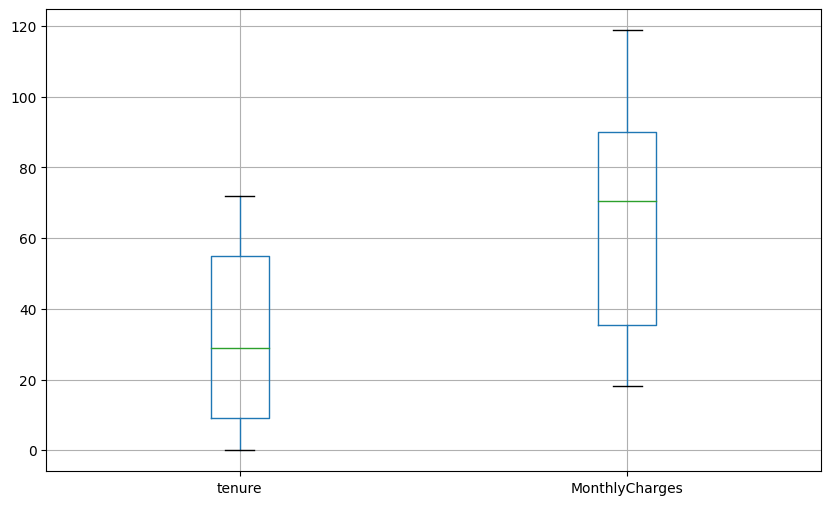

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
Telco_data[['tenure', 'MonthlyCharges', 'TotalCharges']].boxplot()
plt.show()

### Processing

In [ ]:
Telco_data['TotalCharges'] = pd.to_numeric(Telco_data['TotalCharges'], errors='coerce')
Telco_data['SeniorCitizen']= Telco_data['SeniorCitizen'].astype('object')
Telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
Telco_data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
Telco_data['TotalCharges'].fillna(Telco_data['TotalCharges'].median(), inplace=True)
Telco_data.isnull().sum()

<ipython-input-55-b05162a965c1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Telco_data['TotalCharges'].fillna(Telco_data['TotalCharges'].median(), inplace=True)


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
cate_data = Telco_data.select_dtypes(['object']).columns
le = LabelEncoder()
for col in cate_data:
  Telco_data[col] = le.fit_transform(Telco_data[col])
Telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


## Clean + EDA


In [ ]:
total_customers = len(Telco_data)
churned_customers = Telco_data['Churn'].sum()

churn_rate = (churned_customers / total_customers) * 100

print(f"Tỷ lệ rời bỏ: {churn_rate:.2f}%")

Tỷ lệ rời bỏ: 26.54%


In [ ]:
Telco_data[['tenure','MonthlyCharges','TotalCharges']].describe().round(2)

,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00
mean,32.37,64.76,2281.92
std,24.56,30.09,2265.27
min,0.00,18.25,18.80
25%,9.00,35.50,402.22
50%,29.00,70.35,1397.48
75%,55.00,89.85,3786.60
max,72.00,118.75,8684.80


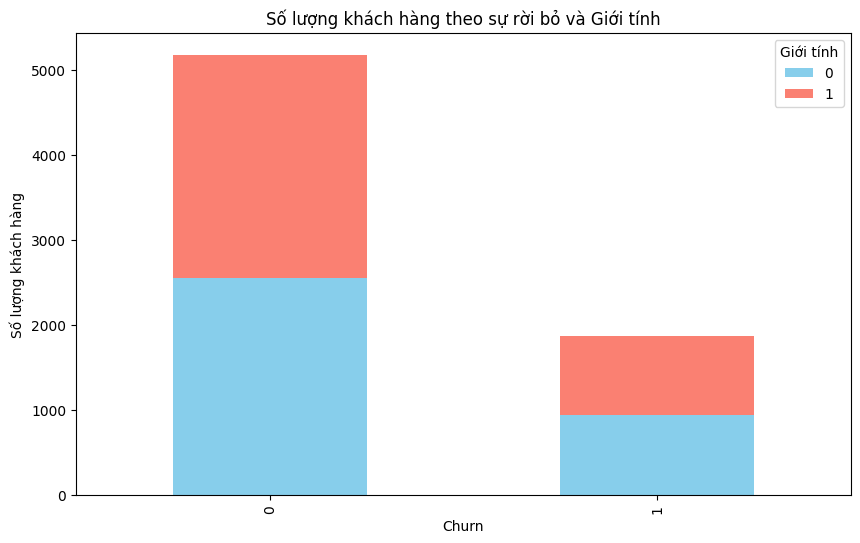

In [ ]:
churn_gender_counts = Telco_data.groupby(['Churn', 'gender'])['gender'].count().unstack()

churn_gender_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(10, 6))
plt.title('Số lượng khách hàng theo sự rời bỏ và Giới tính')
plt.xlabel('Churn')
plt.ylabel('Số lượng khách hàng')
plt.legend(title='Giới tính')
plt.show()

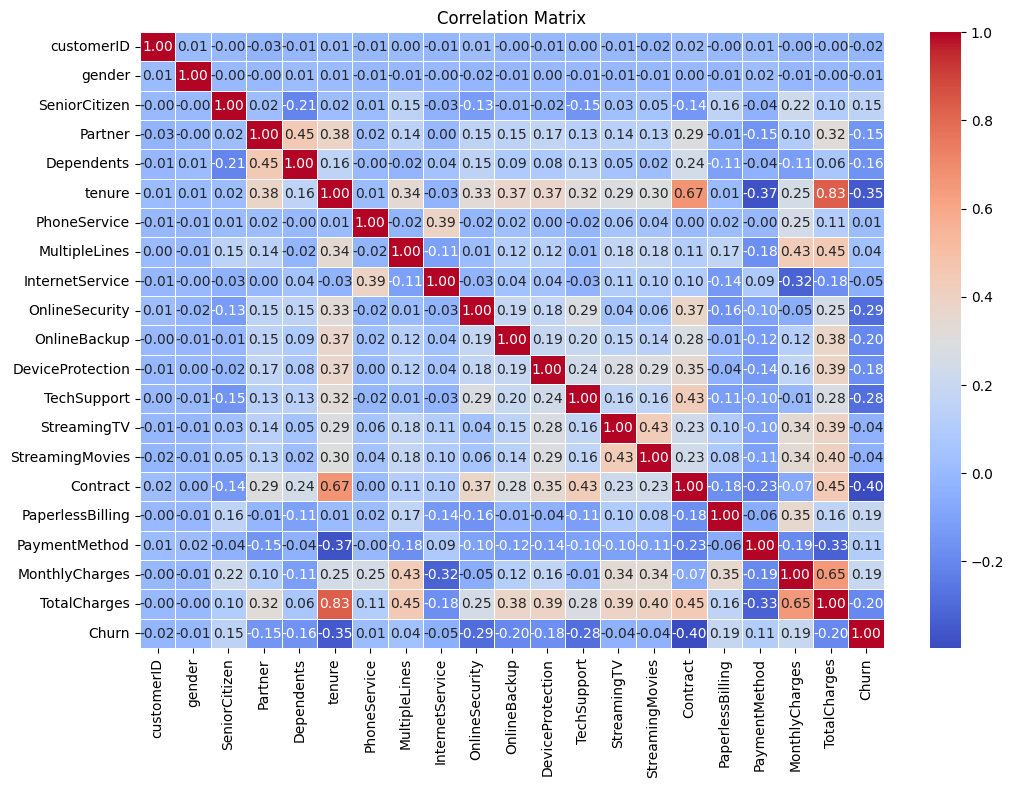

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(Telco_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

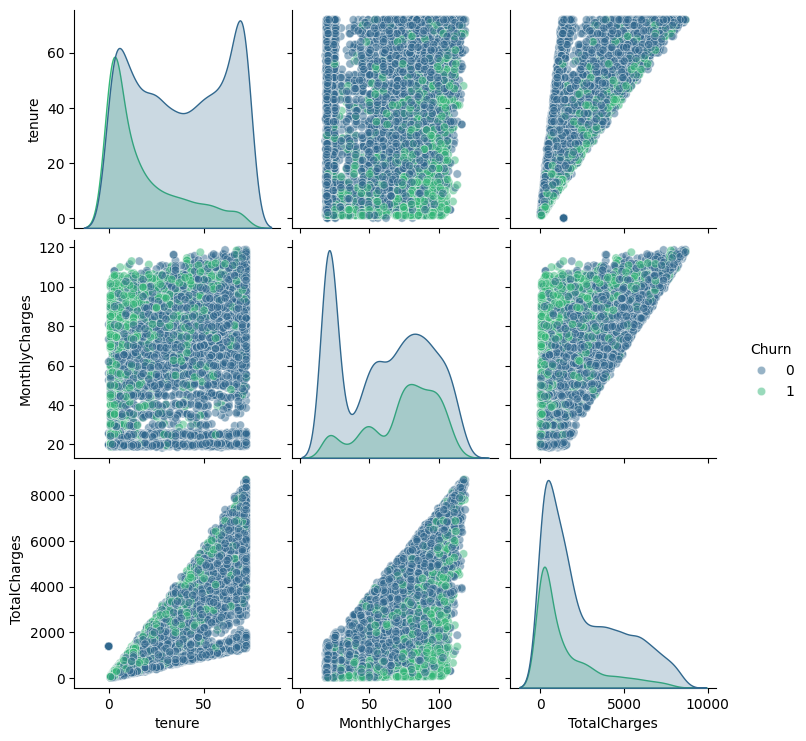

In [ ]:
selected_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
sns.pairplot(Telco_data[selected_features], hue='Churn', palette='viridis', plot_kws={'alpha':0.5})
# plt.suptitle('Pairplot of Selected Features', size=20)
plt.show()

In [ ]:
Telco_data = Telco_data.drop(['customerID'], axis = 1)

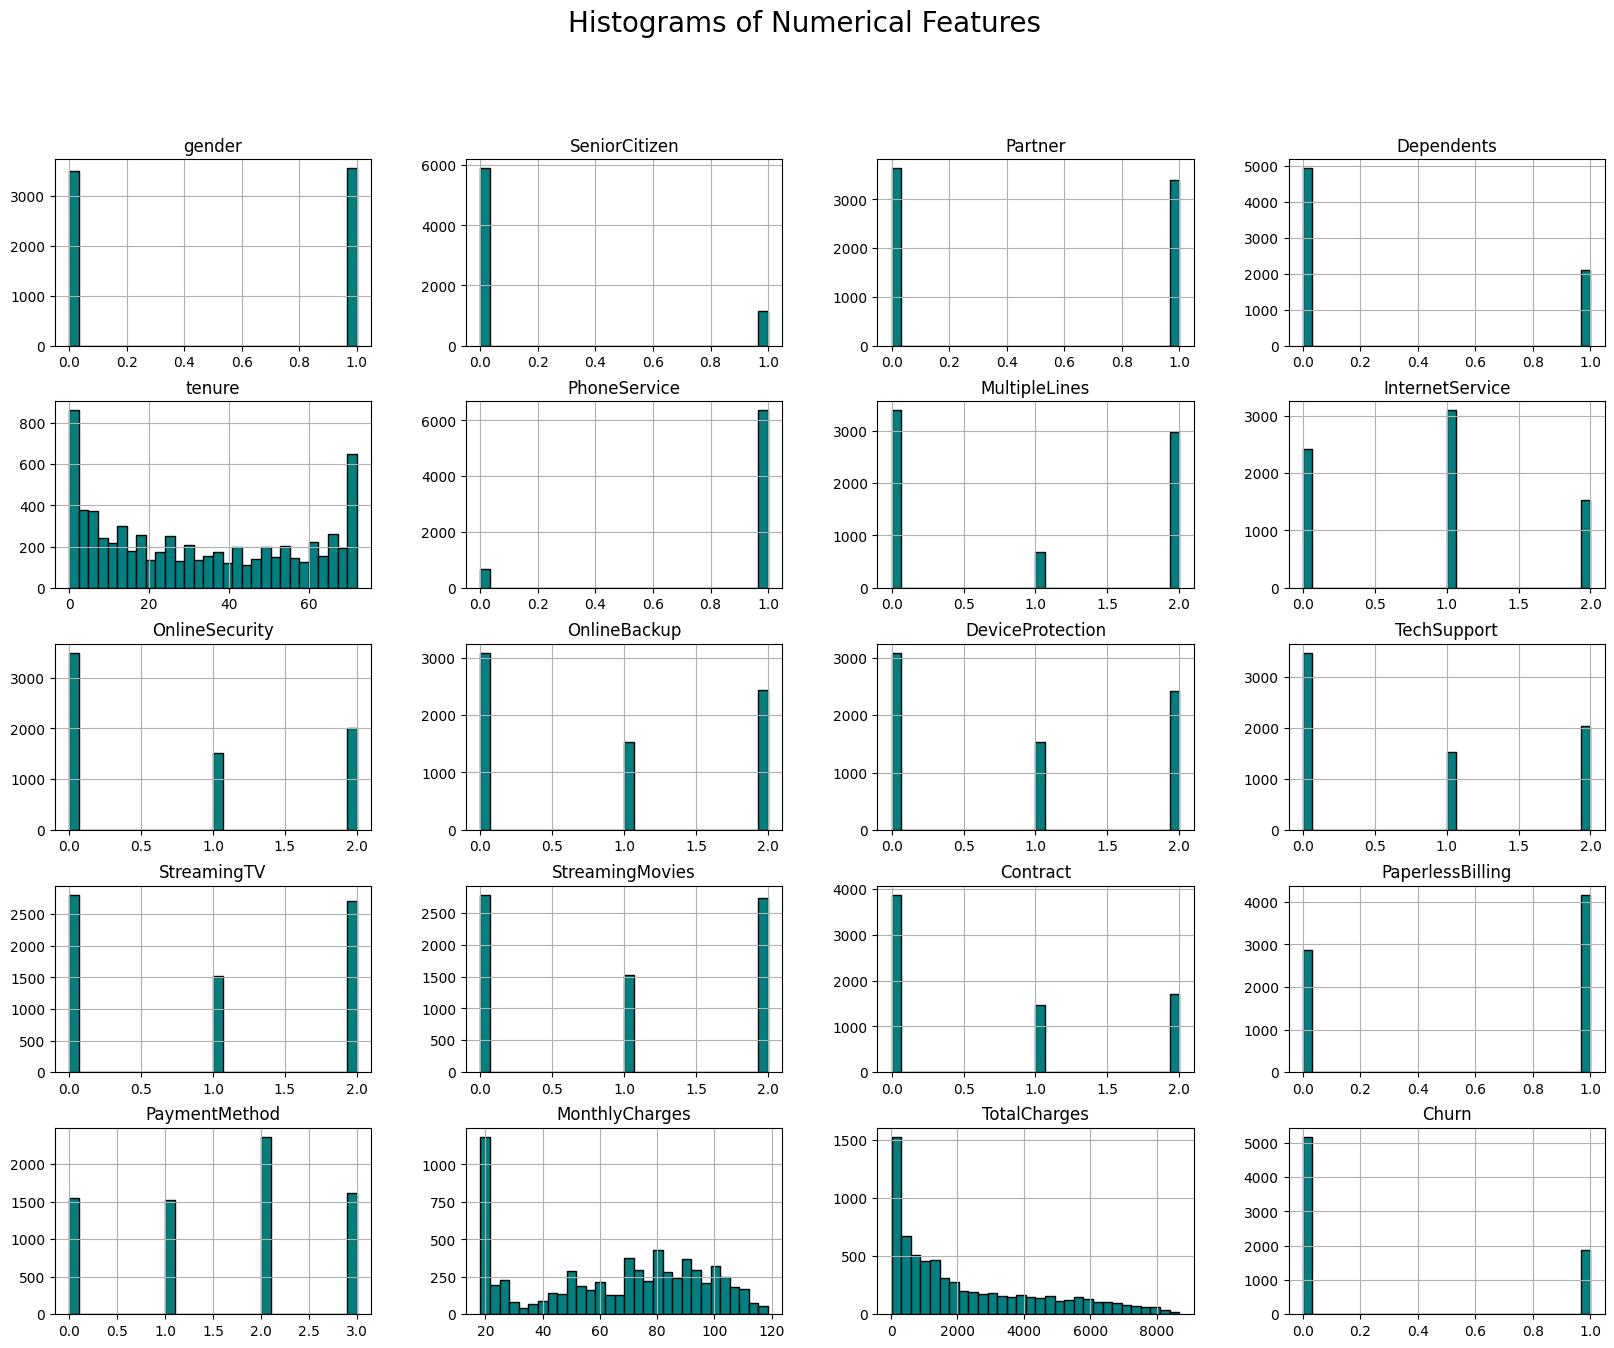

In [ ]:
Telco_data.hist(bins=30, figsize=(20, 15), color='teal', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', size=20)
plt.show()

<ipython-input-63-755755e7761b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=Telco_data, palette='viridis')


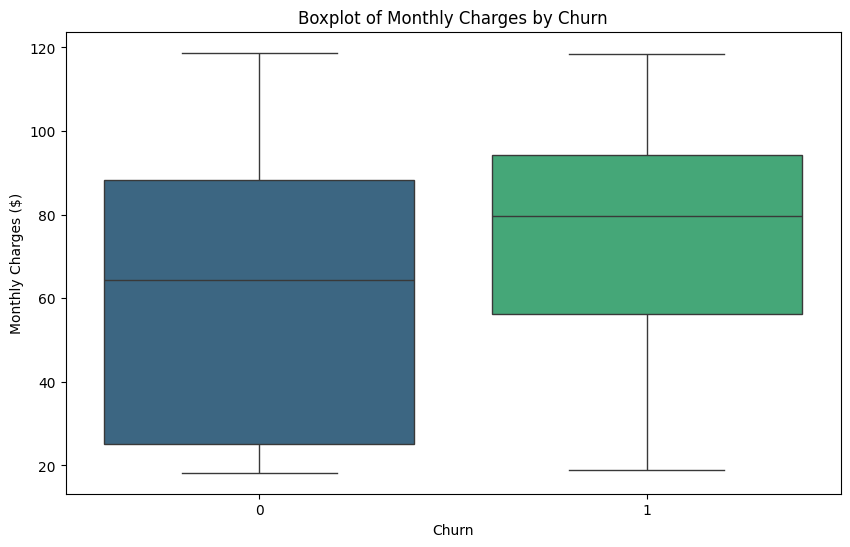

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=Telco_data, palette='viridis')
plt.title('Boxplot of Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges ($)')
plt.show()

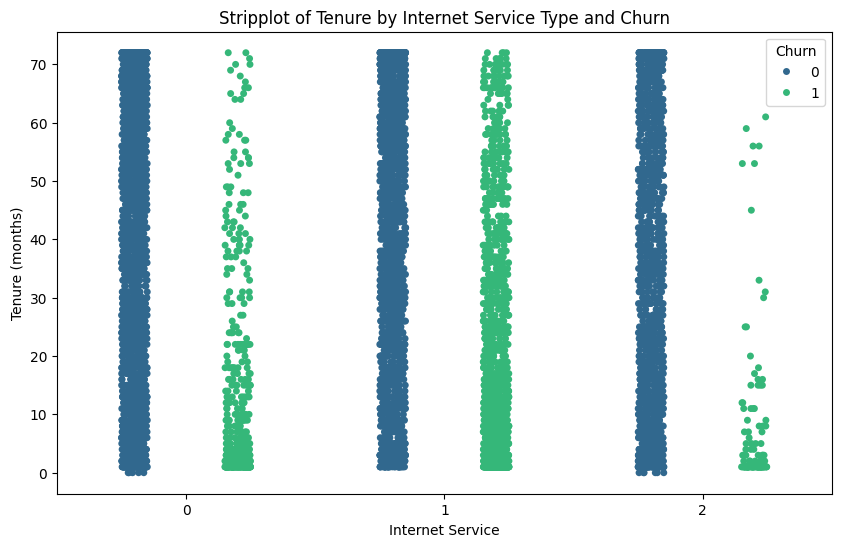

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='InternetService', y='tenure', hue='Churn', data=Telco_data, palette='viridis', jitter=True, dodge=True)
plt.title('Stripplot of Tenure by Internet Service Type and Churn')
plt.xlabel('Internet Service')
plt.ylabel('Tenure (months)')
plt.legend(title='Churn')
plt.show()

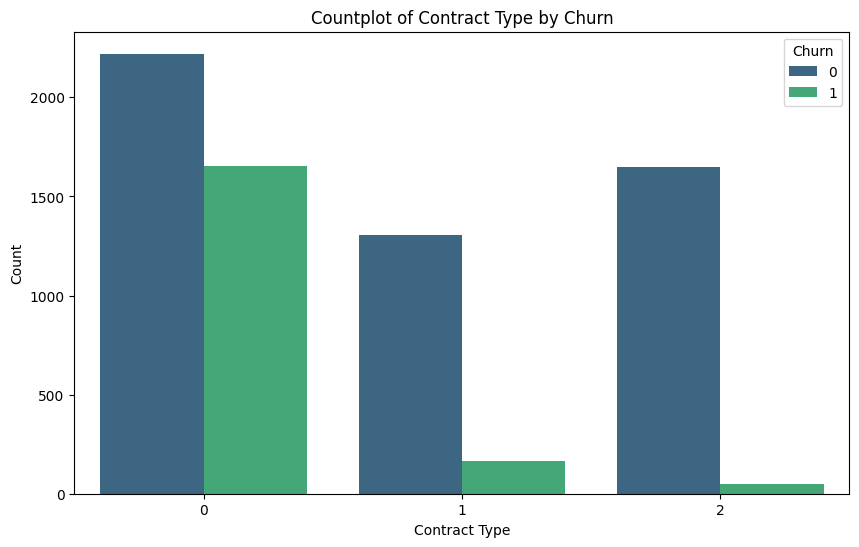

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=Telco_data, palette='viridis')
plt.title('Countplot of Contract Type by Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

<ipython-input-66-d04f40f3c256>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y='TotalCharges', data=Telco_data, palette='viridis')


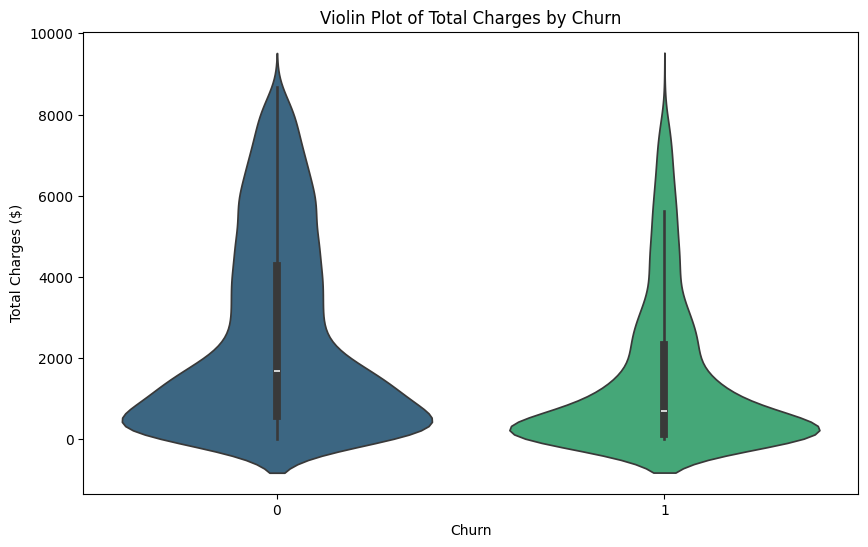

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='TotalCharges', data=Telco_data, palette='viridis')
plt.title('Violin Plot of Total Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges ($)')
plt.show()

## MODEL

In [ ]:
x = Telco_data.drop('Churn', axis=1)
y = Telco_data['Churn']

In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_val:", x_val.shape)
print("Shape of x_test:", x_test.shape)

Shape of x_train: (4930, 19)
Shape of x_val: (1056, 19)
Shape of x_test: (1057, 19)


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

In [ ]:
results = []


Logistic Regression 
 Validation Accuracy: 0.8115530303030303
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       778
           1       0.66      0.58      0.62       278

    accuracy                           0.81      1056
   macro avg       0.76      0.74      0.75      1056
weighted avg       0.80      0.81      0.81      1056

[[697  81]
 [118 160]]


____________________


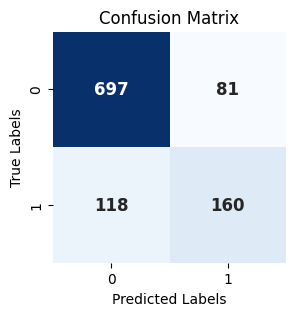


K-Nearest Neighbors 
 Validation Accuracy: 0.7670454545454546
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       778
           1       0.56      0.51      0.53       278

    accuracy                           0.77      1056
   macro avg       0.70      0.68      0.69      1056
weighted avg       0.76      0.77      0.76      1056

[[669 109]
 [137 141]]


____________________


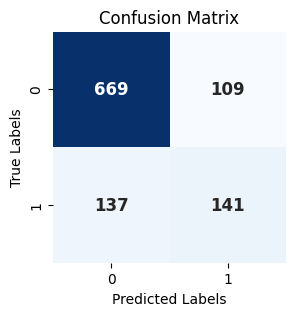


Random Forest 
 Validation Accuracy: 0.8020833333333334
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       778
           1       0.68      0.46      0.55       278

    accuracy                           0.80      1056
   macro avg       0.76      0.69      0.71      1056
weighted avg       0.79      0.80      0.79      1056

[[718  60]
 [149 129]]


____________________


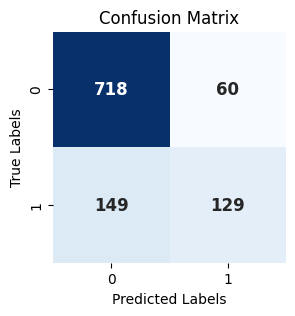

In [ ]:
for name, model in models.items():
  model.fit(x_train, y_train)

  y_pred = model.predict(x_val)

  accuracy = accuracy_score(y_val, y_pred)

  report = classification_report(y_val, y_pred, output_dict=True)

  confusion = confusion_matrix(y_val, y_pred)

  print(f"\n{name} \n Validation Accuracy: {accuracy}")
  print(classification_report(y_val, y_pred))
  print(confusion)
  print("\n")
  print("_"*20)

  results.append({
      'Model': name,
      'Accuracy': accuracy,
  })
  plt.figure(figsize=(3,3))
  sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'fontsize': 12, 'fontweight': 'bold'})
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()

In [ ]:
results_Telcodata = pd.DataFrame(results)